In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
data = pd.read_csv('AmesHousing.csv', sep='\t')
print(data.shape)
data.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [27]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [3]:
print(data['Alley'].isnull().sum())

2732


In [4]:
data['Lot Frontage'].fillna(data['Lot Frontage'].median(), inplace=True)

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/637132153.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Lot Frontage'].fillna(data['Lot Frontage'].median(), inplace=True)


In [5]:
data[data['Alley'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.isna().any()

Order             False
PID               False
MS SubClass       False
MS Zoning         False
Lot Frontage      False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 82, dtype: bool

In [10]:
na_cols = data.columns[data.isna().any()]
print(na_cols.tolist())

['Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


In [11]:
data.isnull().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In [13]:
#finding duplicates
data[data.duplicated()].count().sum()

np.int64(0)

In [15]:
print("Dimensions of the dataset: ", data.shape, "\n\n")
print("Summary of dataset: " , data.info() )

Dimensions of the dataset:  (2930, 82) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

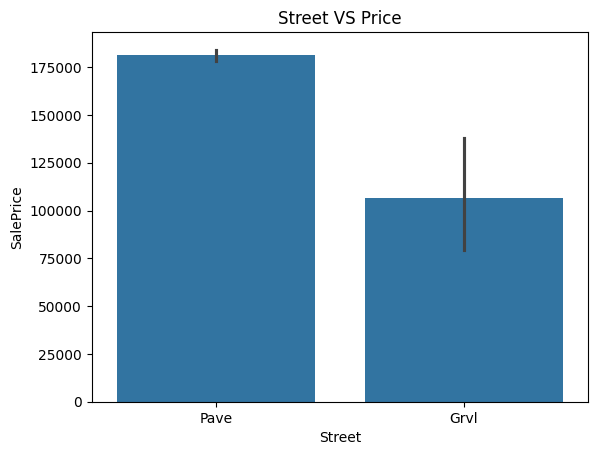

In [23]:
sns.barplot(data ,x='Street',y="SalePrice",)
plt.title("Street VS Price")

plt.show()

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/3386822442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Overall Qual', y='SalePrice',  palette="viridis")


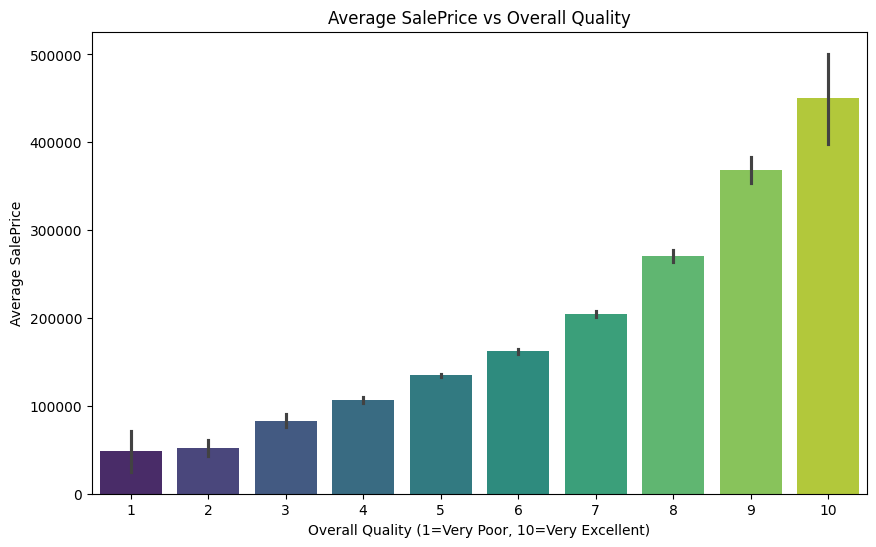

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Overall Qual', y='SalePrice',  palette="viridis")
plt.title("Average SalePrice vs Overall Quality")
plt.xlabel("Overall Quality (1=Very Poor, 10=Very Excellent)")
plt.ylabel("Average SalePrice")
plt.show()

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/447656350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Overall Cond', y='SalePrice', palette="magma")


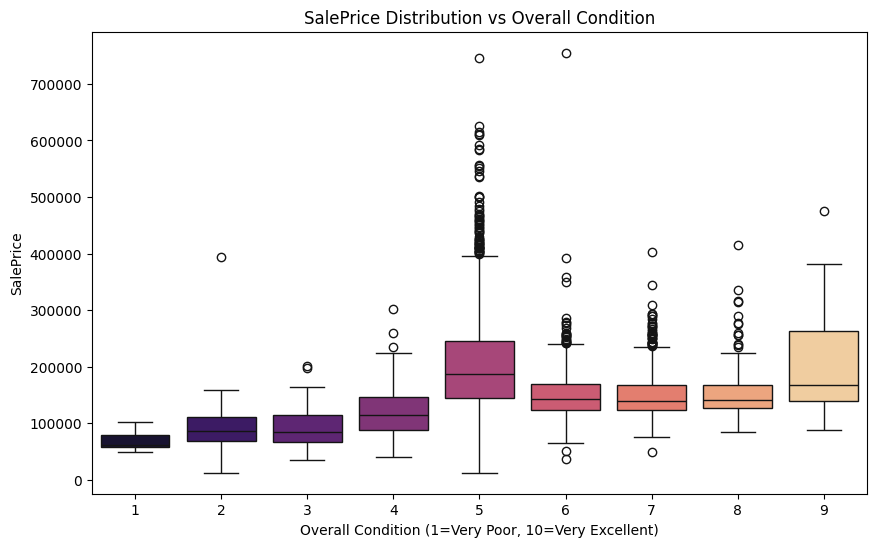

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Overall Cond', y='SalePrice', palette="magma")
plt.title("SalePrice Distribution vs Overall Condition")
plt.xlabel("Overall Condition (1=Very Poor, 10=Very Excellent)")
plt.ylabel("SalePrice")
plt.show()


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/3092077552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Overall Cond', y='SalePrice',  palette="pink")


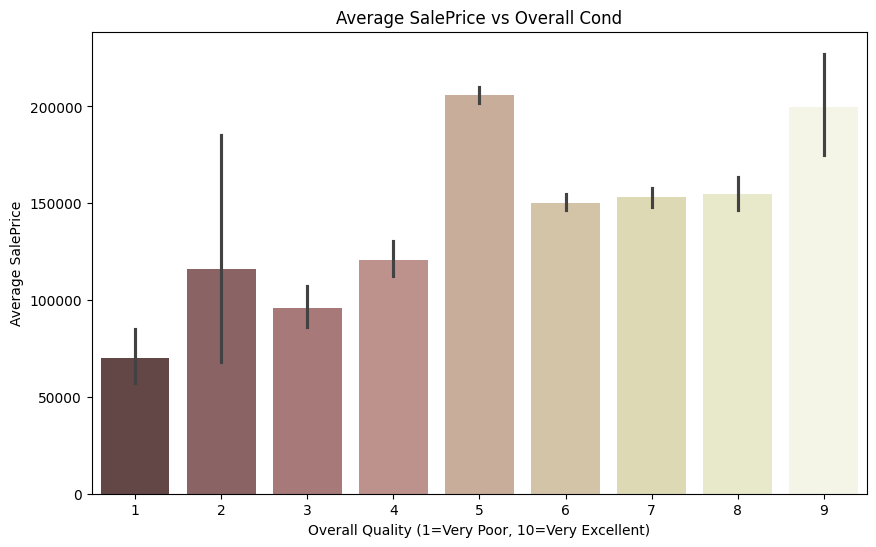

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Overall Cond', y='SalePrice',  palette="pink")
plt.title("Average SalePrice vs Overall Cond")
plt.xlabel("Overall Quality (1=Very Poor, 10=Very Excellent)")
plt.ylabel("Average SalePrice")
plt.show()

In [53]:
data['Bsmt Cond'] = data['Bsmt Cond'].fillna('NA')


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/1970824943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Bsmt Cond', y='SalePrice', order=bsmt_order,  palette="dark")


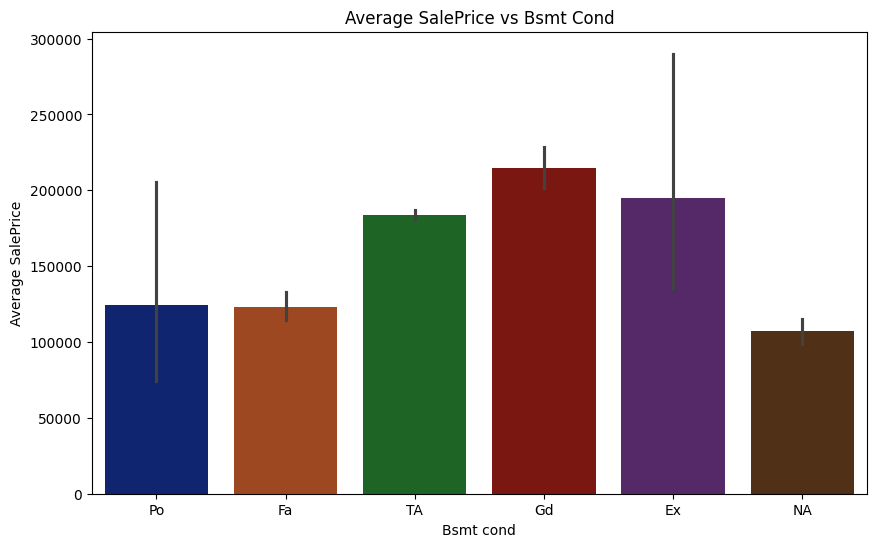

In [54]:
plt.figure(figsize=(10,6))
bsmt_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA']
sns.barplot(data=data, x='Bsmt Cond', y='SalePrice', order=bsmt_order,  palette="dark")
plt.title("Average SalePrice vs Bsmt Cond")
plt.xlabel("Bsmt cond")
plt.ylabel("Average SalePrice")
plt.show()

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/3217698845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Bsmt Cond', y='SalePrice', order=bsmt_order, palette="dark")


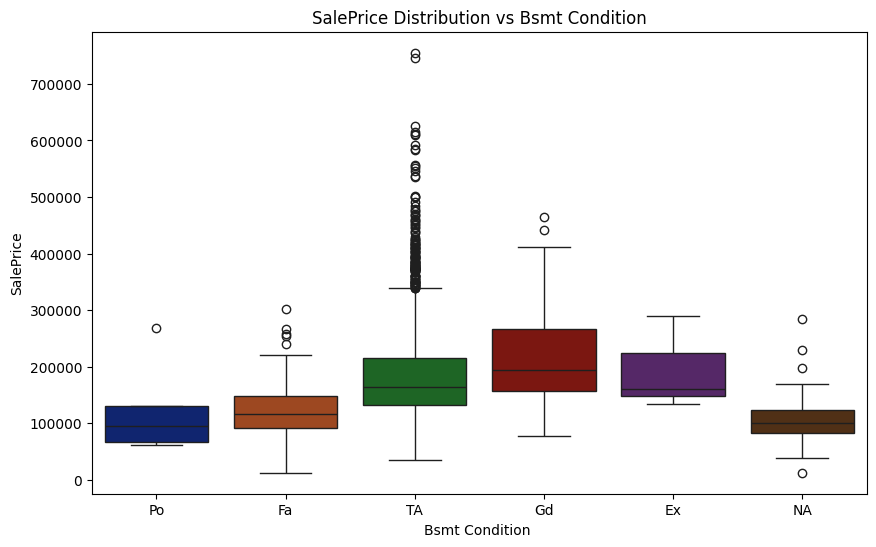

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Bsmt Cond', y='SalePrice', order=bsmt_order, palette="dark")
plt.title("SalePrice Distribution vs Bsmt Condition")
plt.xlabel("Bsmt Condition ")
plt.ylabel("SalePrice")
plt.show()


In [58]:
data['Bsmt Qual'] = data['Bsmt Qual'].fillna('NA')


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/992307098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Bsmt Qual', y='SalePrice', order=bsmt_order,  palette="coolwarm")


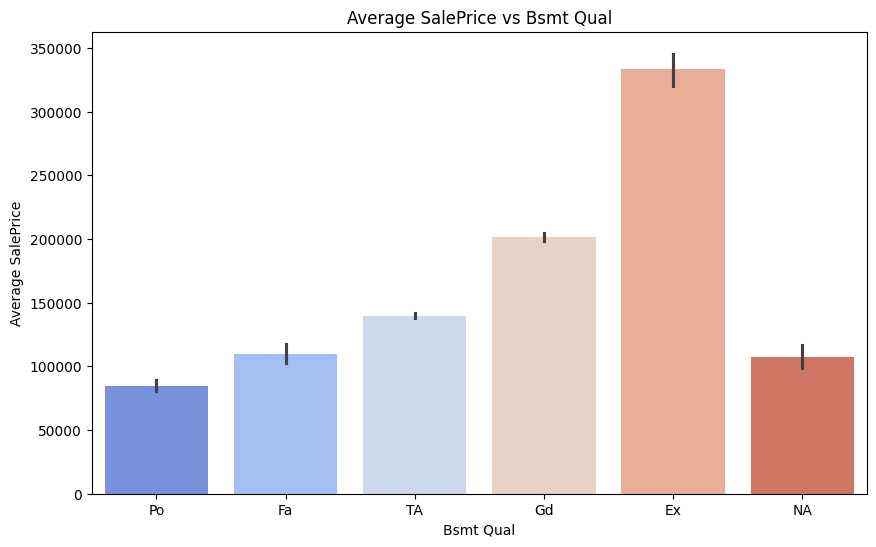

In [59]:
plt.figure(figsize=(10,6))
bsmt_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'NA']
sns.barplot(data=data, x='Bsmt Qual', y='SalePrice', order=bsmt_order,  palette="coolwarm")
plt.title("Average SalePrice vs Bsmt Qual")
plt.xlabel("Bsmt Qual")
plt.ylabel("Average SalePrice")
plt.show()

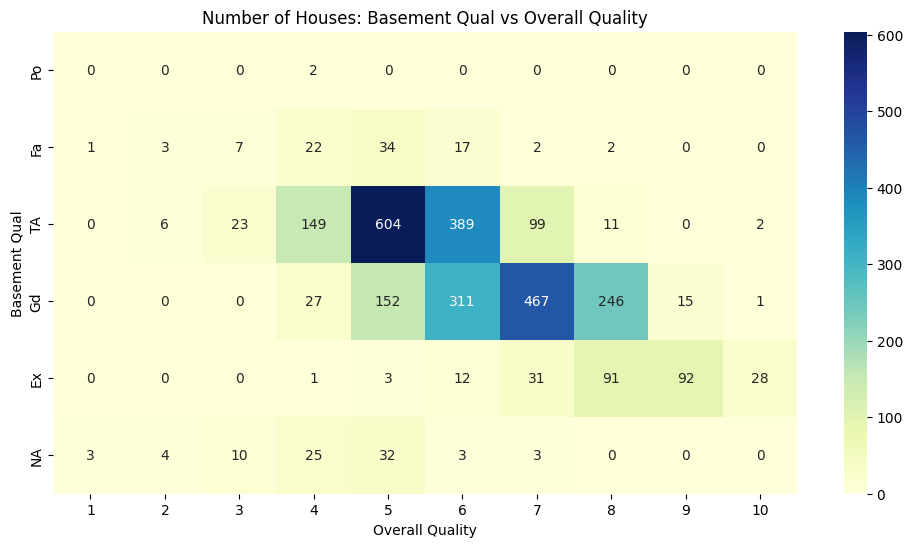

In [60]:
data['Bsmt Qual'] = pd.Categorical(
    data['Bsmt Qual'],
    categories=bsmt_order,
    ordered=True
)
cross = pd.crosstab(data['Bsmt Qual'], data['Overall Qual'])
plt.figure(figsize=(12,6))
sns.heatmap(cross, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Houses: Basement Qual vs Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Basement Qual")
plt.show()

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/2209128749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Bsmt Qual', y='Overall Qual', order=bsmt_order, palette="coolwarm")


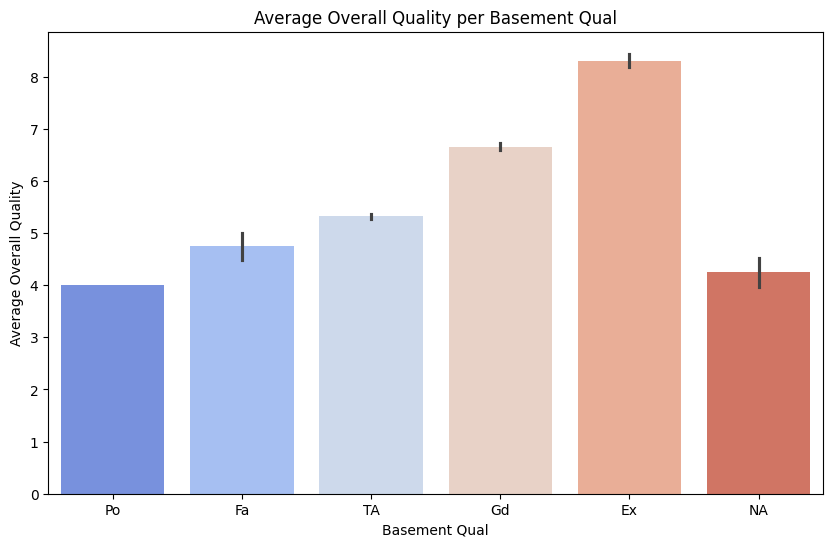

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Bsmt Qual', y='Overall Qual', order=bsmt_order, palette="coolwarm")
plt.title("Average Overall Quality per Basement Qual")
plt.xlabel("Basement Qual")
plt.ylabel("Average Overall Quality")
plt.show()

In [ ]:
data['Bsmt Cond'].isna().sum(), (data['Bsmt Cond'] == 'NA').sum()


(np.int64(0), np.int64(80))

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_84613/3724179870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='MS Zoning', y='SalePrice', palette="cool")


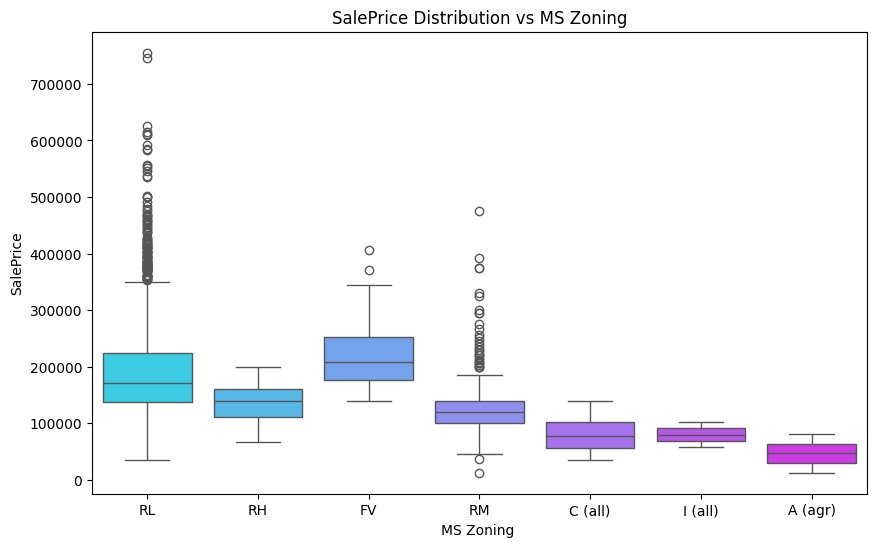

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='MS Zoning', y='SalePrice', palette="cool")
plt.title("SalePrice Distribution vs MS Zoning")
plt.xlabel("MS Zoning ")
plt.ylabel("SalePrice")
plt.show()

In [66]:
data['MS Zoning'].isna().sum(), (data['MS Zoning'] == 'RP').sum() #nu exista rp

(np.int64(0), np.int64(0))

In [70]:
data['Lot Area'].nunique()

1960

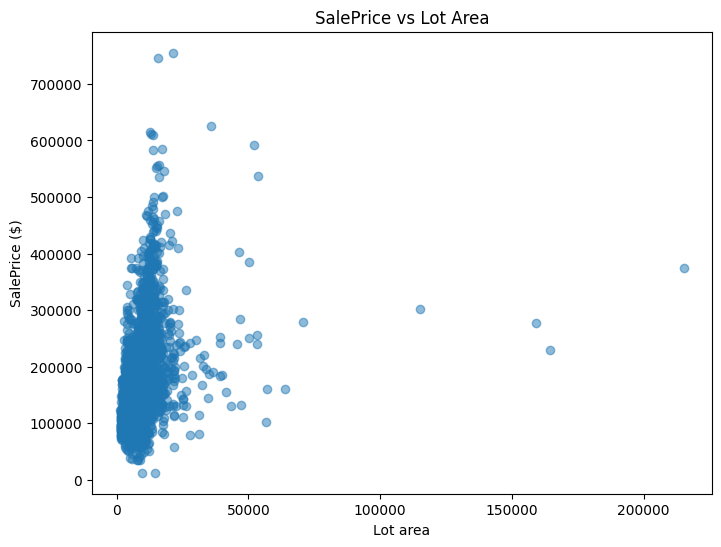

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=data['Lot Area'], 
            y=data['SalePrice'], 
            alpha=0.5)
plt.title("SalePrice vs Lot Area")
plt.xlabel("Lot")
plt.ylabel("SalePrice ($)")
plt.show()


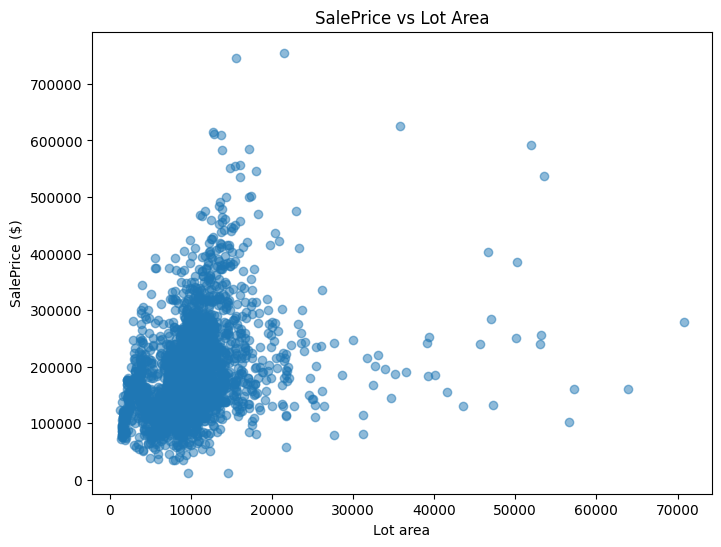

In [79]:
subset = data[data['Lot Area'] < 100000]
plt.figure(figsize=(8,6))
plt.scatter(x=subset['Lot Area'], 
            y=subset['SalePrice'], 
            alpha=0.5)
plt.title("SalePrice vs Lot Area")
plt.xlabel("Lot area")
plt.ylabel("SalePrice ($)")
plt.show()